Total images loaded: 10015


2024-11-17 19:50:30.896676: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46299 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2024-11-17 19:50:30.898993: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 49545 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
2024-11-17 19:50:30.900759: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 45978 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:47:00.0, compute capability: 8.0
2024-11-17 19:50:30.902730: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 75045 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-80GB, pci bu

Epoch 1/50


2024-11-17 19:50:33.833301: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-11-17 19:50:34.024851: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-11-17 19:50:35.089754: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-11-17 19:50:35.119815: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb1f02d45c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-17 19:50:35.119853: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2024-11-17 19:50:35.119857: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2024-11-17 19:50:35.119861: I tensorflow/compiler/xla/servi

250/250 [==============================] - 74s 269ms/step - loss: 0.8846 - accuracy: 0.6929 - val_loss: 0.7521 - val_accuracy: 0.7374
Epoch 2/50
250/250 [==============================] - 68s 271ms/step - loss: 0.6488 - accuracy: 0.7657 - val_loss: 0.6315 - val_accuracy: 0.7673
Epoch 3/50
250/250 [==============================] - 67s 267ms/step - loss: 0.5705 - accuracy: 0.7942 - val_loss: 0.6004 - val_accuracy: 0.7828
Epoch 4/50
250/250 [==============================] - 66s 262ms/step - loss: 0.5063 - accuracy: 0.8183 - val_loss: 0.5472 - val_accuracy: 0.8008
Epoch 5/50
250/250 [==============================] - 68s 270ms/step - loss: 0.4565 - accuracy: 0.8328 - val_loss: 0.5727 - val_accuracy: 0.7893
Epoch 6/50
250/250 [==============================] - 66s 263ms/step - loss: 0.4289 - accuracy: 0.8434 - val_loss: 0.5913 - val_accuracy: 0.8033
Epoch 7/50
250/250 [==============================] - 65s 258ms/step - loss: 0.3897 - accuracy: 0.8563 - val_loss: 0.6081 - val_accuracy: 0.7

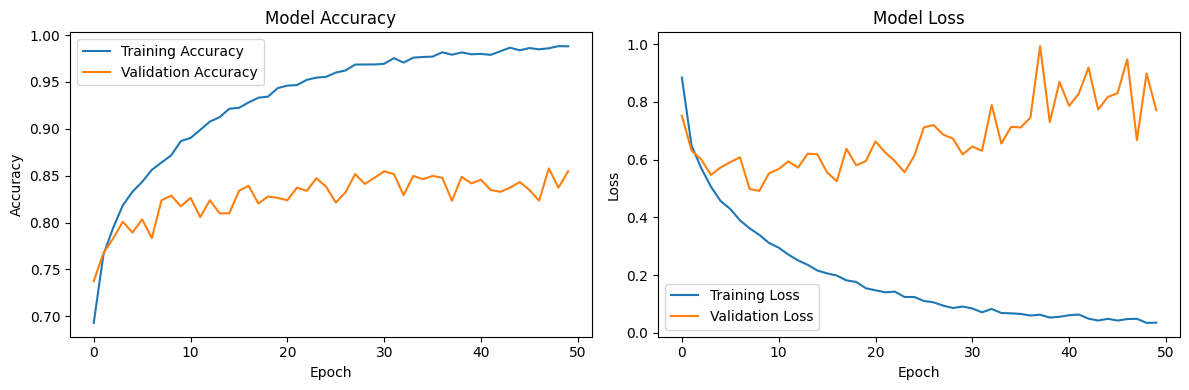

Test accuracy: 0.8547
63/63 [==============================] - 1s 18ms/step
              precision    recall  f1-score   support

       akiec       0.72      0.45      0.55        62
         bcc       0.65      0.88      0.75       104
         bkl       0.73      0.70      0.71       222
          df       0.91      0.62      0.74        34
         mel       0.64      0.65      0.65       210
          nv       0.93      0.93      0.93      1340
        vasc       0.94      0.97      0.95        31

    accuracy                           0.85      2003
   macro avg       0.79      0.74      0.75      2003
weighted avg       0.86      0.85      0.85      2003



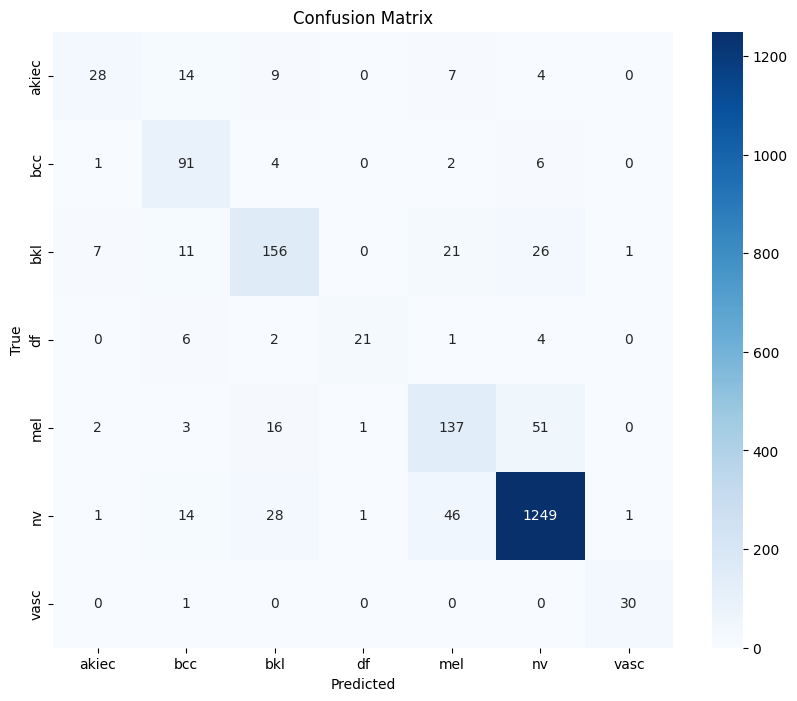

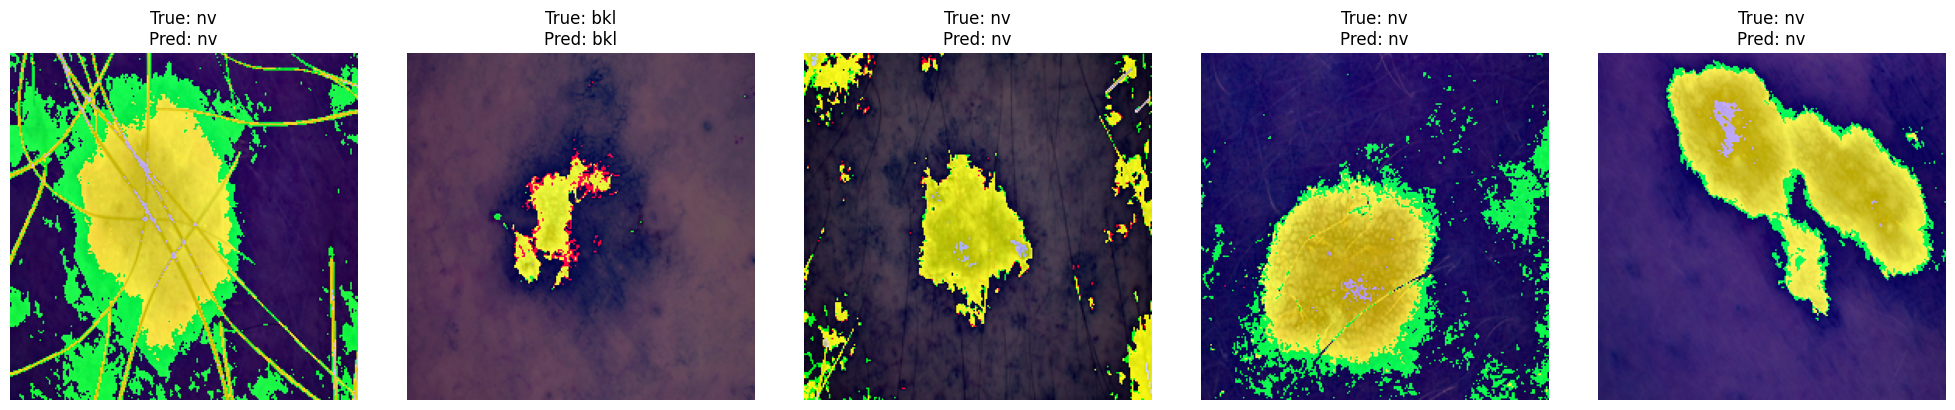

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
path_part_1 = "d1_images/HAM10000_images_part_1"
path_part_2 = "d2_images/HAM10000_images_part_2"
metadata_path = "HAM10000_metadata.csv"

# Load metadata CSV
metadata = pd.read_csv(metadata_path)

# Function to load images
def load_images(path):
    images = {}
    for filename in os.listdir(path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(path, filename)
            img = Image.open(img_path)
            images[filename] = img
    return images

# Load images from both parts
images_part_1 = load_images(path_part_1)
images_part_2 = load_images(path_part_2)

# Combine the two parts
combined_images = {**images_part_1, **images_part_2}

print(f"Total images loaded: {len(combined_images)}")

# Prepare the data
def prepare_data(image_dict, metadata_df, target_size=(224, 224)):
    X = []
    y = []
    for image_id, image in image_dict.items():
        img = image.resize(target_size)
        img_array = np.array(img)
        X.append(img_array)
        
        # Get the corresponding diagnosis
        dx = metadata_df[metadata_df['image_id'] == image_id.split('.')[0]]['dx'].values[0]
        y.append(dx)
    
    X = np.array(X)
    y = np.array(y)
    
    return X, y

# Prepare the data
X, y = prepare_data(combined_images, metadata, target_size=(224, 224))

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Preprocess input
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

# Configure GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
        
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output = Dense(len(le.classes_), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Unfreeze all layers for fine-tuning
for layer in model.layers:
    layer.trainable = True

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Sample predictions
n_samples = 5
sample_indices = np.random.choice(len(X_test), n_samples, replace=False)

plt.figure(figsize=(20, 4))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, n_samples, i+1)
    plt.imshow(X_test[idx].astype(np.uint8))
    true_label = le.classes_[np.argmax(y_test[idx])]
    pred_label = le.classes_[np.argmax(y_pred[idx])]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
